In [26]:

import numpy as np
from numpy.random import uniform, normal, poisson, gamma, binomial
from scipy import stats
import scipy.special as sps

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
%matplotlib inline

## Линейная модель




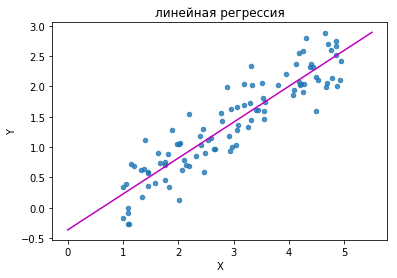

In [83]:
# искусственные данные
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample) # входная переменная
mu = a * x + b  # линейный закон идеальной регрессии для выходной переменной
y = normal(mu, sd) # нормальный разброс вокруг идеального

# линейная модель регрессии
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals, 'm')
plt.title('линейная регрессия')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Обобщенные линейные модели (Generalized Linear Models, GLM) 

(ссылки https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab)


Пусть $y$ – целевая переменная, $X$ – матрица объясняющих переменных, $\beta$ – вектор параметров модели.

Матрица $X$ составлена из всех векторов наблюдений $x_i$, каждый из которых представляет собой объясняющую переменную.

Основные компоненты обобщенной линейной модели:
* Систематическая компонента $\eta$:
    * $\eta = X\beta \hspace{10pt}(=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_nx_n)$.
* Случайная компонента $y$:
    * Элементы вектора $y$ – независимые одинаково распределенные случайные величины, имеющие функцию плотности распределения $f(y;\theta,\phi)$ из экспоненциального семейства.
    * Распределения из экспоненциального семейства имеют параметры $\theta$ (характеристика среднего) и $\phi$ (характеристика дисперсии). В общем виде данные распределения могут быть определены:
    $$f_i(y_i;\theta_i,\phi)=\exp\left\lbrace \frac{y_i\theta_i-b(\theta_i)}{a_i(\phi)} + c(y_i, \phi) \right\rbrace,$$
    где $a_i(\phi)$, $b(\theta_i)$ и $c(y_i, \phi)$ некоторые функции.
    * Для распределений из данного семейства дисперсия является функцией от среднего.
    * Экспоненциальное семейство включает распределения нормальное, экспоненциальное, Пуассона, гамма, хи-квадрат, бета и другие.
* Функция связи $g$:
    * $\mathbb{E}\left[y\right]=\mu=g^{-1}\left(\eta\right)$, $\mu$ – математическое ожидание $y$;
    * $g$ – монотонная дифференцируемая функция.


## Метирка для GLM   - Deviance

Метрика Deviance представляет собой отношение правдоподобия между двумя моделями: рассматриваемой моделью и "идеальной" моделью, в которая бы идеально предсказывала бы зависимую переменную.
$$Deviance = 2(\ell_{ideal} - \ell_{model})$$


Экспоненциальные распределения:

Для непрерывных величин:

▶ Нормальное распределение

▶ Гамма распределение

Для дискретных величин:

▶ Биномиальное распределение

▶ Распределение Пуассона

▶ Отрицательное биномиальное распределение

## Распределение Пуассона 

Функция вероятности для распределения Пуассона имеет вид:
$$p(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, \hspace{10pt} \lambda\in\mathbb{R}^{+}.$$

* $ \lambda $ — математическое ожидание случайной величины (среднее количество событий за фиксированный промежуток времени),
* $ k! $ обозначает факториал числа $ k $,

* $ p(k;\lambda) = p(y == k) $


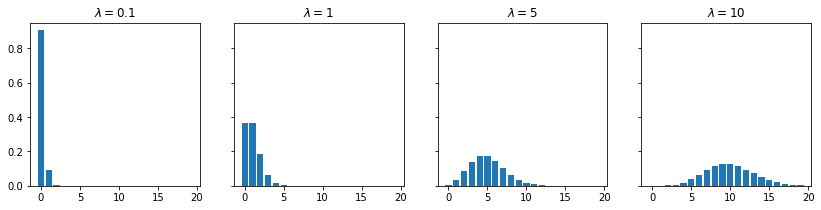

In [68]:
## Распределение Пуассона
fig, axes = plt.subplots(1, 4, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [0.1, 1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = stats.poisson.pmf(xx, lam)  # Распределение Пуассона по разным значениям основного параметра 
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

plt.show()

##  Пуассон регрессия  - Poission regression


Регрессия Пуассона обычно используется в случаях, когда зависимая переменная представляет собой счетные значения и ошибки предполагаются распределенными в соответствии с распределением Пуассона. Зависимая переменная должна быть неотрицательной.

Функции связи между таргетом и объясняющими переменными предполагается логарифмической:
$$g(\eta) = \ln(\eta) \Rightarrow \hat {y} = e^{x{^T}\beta + {\beta_{0}}}.$$

Модель оценивается методом максимального правдоподобия, функция логарифма правдоподобия с учетом штрафа регуляризации эластичной сети имеет вид:
$$\max_{\beta,\beta_0} \frac{1}{N} \sum_{i=1}^{N} \Big( y_i(x_{i}^{T}\beta + \beta_0) - e^{x{^T_i}\beta + {\beta_0}} \Big)- \phi \Big( \alpha||\beta||_1 + \dfrac {1} {2}(1 - \alpha)||\beta||^2_2 \Big),$$

где 
* $\phi$ – параметр, отвечающий за силу регуляризации. $\phi\in\mathbb{R}^{+}$;
* $\alpha$ – параметр, отвечающий за распределение штрафов регуляризации между нормой 1 ($\ell_1$) и нормой 2 ($\ell_2$). $\alpha\in[0,1]$;
* $||\beta||{_1}$ – штраф регуляризации $\ell_1$ (LASSO). $||\beta||{_1} = \sum{^p_{k=1}} |\beta{_k}|$;
* $||\beta||{_2}$ – штраф регуляризации $\ell_2$ (Ridge). $||\beta||{_2} = \sum{^p_{k=1}} \beta{^2_k}$.

Тогда соответствующая метрика _Deviance_ имеет вид:
$$D = -2 \sum_{i=1}^{N} \big( y_i \text{ln}(y_i / \hat {y}_i) - (y_i - \hat {y}_i) \big).$$





##### Вывод функции правдоподобия для GLM с распределением Пуассона (без регуляризации)


Напомним, что функция вероятности для распределения Пуассона имеет вид:
$$p(k;\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, \hspace{10pt} \lambda\in\mathbb{R}^{+}.$$
Также, для распределения Пуассона справедливо, что:
$$\mathbb{E}\left[k\right] = Var(k) = \lambda.$$
Тогда, для оценивания коэффициентов нашей модели необходимо максимизировать правдоподобие (совместную условную вероятность при имеющихся данных), что данные имеют распределение Пуассона:
$$p(y_1,\dots,y_n|x_1,\dots,x_n;\beta_0,\beta) = \prod_{i=1}^{N}\frac{e^{y_i(x_i{^T}\beta + {\beta_{0}})} e^{-e^{x_i{^T}\beta + {\beta_{0}}}}}{y_i!} = L(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n).$$
Для упрощения задачи оптимизации перейдем к логарифму правдоподобия:
$$\ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n) = \sum_{i=1}^{N}\left(y_i(x_i{^T}\beta + {\beta_{0}}) -e^{x_i{^T}\beta + {\beta_{0}}}-\ln(y_i!)\right).$$
Поскольку величина $\ln(y_i!)$ не зависит от выбора параметров, можно упростить задачу:
$$\ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n) = \sum_{i=1}^{N}\left(y_i(x_i{^T}\beta + {\beta_{0}}) -e^{x_i{^T}\beta + {\beta_{0}}}\right).$$
Далее решается задача оптимизации для определения параметров модели (пакеты реализуют оптимизацию численными методами):
$$\frac{\partial \ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n)}{\partial \beta_0} = 0,\\\frac{\partial \ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n)}{\partial \beta} = 0.$$
Обычно минимизируется отрицательное правдоподобие, которое является выпуклой функцией.


##### Вывод метрики Deviance для GLM с распределением Пуассона


Метрика Deviance представляет собой отношение правдоподобия между двумя моделями: рассматриваемой моделью и "идеальной" моделью, в которая бы идеально предсказывала бы зависимую переменную.
$$Deviance = 2(\ell_{ideal} - \ell_{model})$$

В качестве такой "идеальной модели" может использоваться сама зависимая переменная. Тогда, логарифм правдоподобия "идеальной модели" для GLM с распределением Пуассона имеет вид:
$$\ell_{ideal} = \sum_{i=1}^{N}\left(y_i \ln(y_i) -y_i-\ln(y_i!)\right).$$

Из приведенного выше вывода правдоподобия для рассматриваемой модели, мы можем записать, обозначив $\hat{y}_i = e^{x{^T}\beta + {\beta_{0}}}$:
$$\ell_{model} = \sum_{i=1}^{N}\left(y_i \ln(\hat{y}_i) -\hat{y}_i-\ln(y_i!)\right).$$

Тогда получаем,
$$Deviance = 2\sum_{i=1}^{N}\left(y_i \ln(y_i) -y_i - y_i \ln(\hat{y}_i) +\hat{y}_i\right) = -2\sum_{i=1}^{N}\left(y_i \ln(y_i/\hat{y}_i) - (y_i -\hat{y}_i)\right).$$


входы : 
 [[1.         1.88797268]
 [1.         4.48292922]
 [1.         1.82687662]] 
выход:
 [ 5 23  2]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      498
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.0
Date:                Mon, 16 Nov 2020   Deviance:                       546.72
Time:                        17:29:12   Pearson chi2:                     522.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

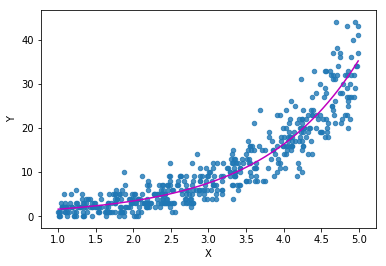

In [69]:
## регрессия по распределению Пуассона - Poisson regression

# искусственные данные
np.random.seed(5)
n_sample = 500
a = 0.8
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)  # закон для мат.ожид
y = poisson(mu) # строим распределение пуассона на идеальной регрессии mu

exog, endog = sm.add_constant(x), y   # определяем вход (с добавление столбца 1 для свободного члена регрессии) и выход
print('входы : \n',exog[:3,:],'\nвыход:\n',endog[:3])

# Строим обобщенную линейную модель для Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log())) # логарифмическая функция связи
res = mod.fit()
print(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## GLM с гамма-распределением

GLM с гамма-распределением используется для моделирования положительной непрерывной зависимой переменной, когда ее условная дисперсия увеличивается вместе со средним значением, но коэффициент вариации зависимой переменной предполагается постоянным.

Обычно GLM с гамма-распределением используются с логарифмической или обратной функциями связи:
$$g(\eta) = \ln(\eta);\hspace{20pt}g(\eta) = \frac{1}{\eta}.$$

Модель оценивается методом максимального правдоподобия, функция логарифма правдоподобия (для обратной функции связи) с учетом штрафа регуляризации эластичной сети имеет вид:
$$\max_{\beta,\beta_0} - \frac{1}{N} \sum_{i=1}^{N} \frac{y_i}{x{^T_i}\beta + \beta_0} + \text{ln} \big( x{^T_i}\beta + \beta_0 \big ) - \lambda \Big( \alpha||\beta||_1 + \dfrac {1} {2}(1 - \alpha)||\beta||^2_2 \Big),$$

где 
* $\lambda$ – параметр, отвечающий за силу регуляризации. $\lambda\in\mathbb{R}^{+}$;
* $\alpha$ – параметр, отвечающий за распределение штрафов регуляризации между нормой 1 ($\ell_1$) и нормой 2 ($\ell_2$). $\alpha\in[0,1]$;
* $||\beta||{_1}$ – штраф регуляризации $\ell_1$ (LASSO). $||\beta||{_1} = \sum{^p_{k=1}} |\beta{_k}|$;
* $||\beta||{_2}$ – штраф регуляризации $\ell_2$ (Ridge). $||\beta||{_2} = \sum{^p_{k=1}} \beta{^2_k}$.

Соответствующая метрика _Deviance_ имеет вид:
$$D = 2 \sum_{i=1}^{N} - \text{ln} \bigg (\dfrac {y_i} {\hat {y}_i} \bigg) + \dfrac {(y_i - \hat{y}_i)} {\hat {y}_i}.$$




Плотность вероятности для гамма-распределения равна

$$ f (x) = x ^ {\xi-1} \ \frac {e ^ {- x / \ \theta}} {\ \theta ^ \xi \ \Gamma (\xi)},$$

где 
* $\xi$- форма 
* $\theta $- масштаб,
* $\Gamma (\xi)$ - Гамма-функция.

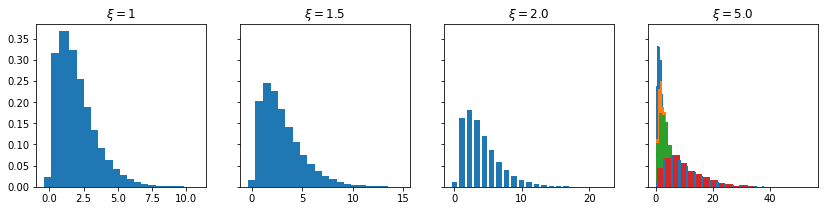

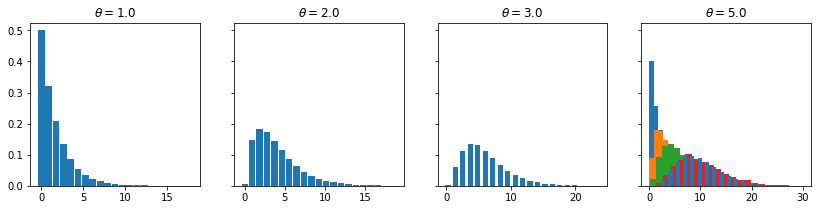

In [75]:
## Гамма Распределение 

n_bins = 20
n_sample = 2000
scale = [1, 1.5, 2.,5.]
shape = [1., 2., 3.,5.]

s_shape = 2.0
fig1, axes1 = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
for i, s in enumerate(scale):
    yy = gamma(2.0,s,n_sample)  # Гамма Распределение  по разным значениям опараметра 
    _, bins, _ = plt.hist(yy, n_bins, density=True)
    y = bins**(s_shape-1)*(np.exp(-bins/s) / (sps.gamma(s_shape)*s**s_shape))
    axes1[i].bar(bins, y)
    axes1[i].set_title(r'$\xi={}$'.format(s))

plt.show()

s_scale = 2
fig2, axes2 = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
for i, s in enumerate(shape):
    yy = gamma(s,s_scale,n_sample)  # Гамма Распределение  по разным значениям опараметра 
    _, bins, _ = plt.hist(yy, n_bins, density=True)
    y = bins**(s-1)*(np.exp(-bins/s_scale) / (sps.gamma(s)*s_scale**s))
    axes2[i].bar(bins, y)
    axes2[i].set_title(r'$\theta={}$'.format(s))

plt.show()

##### Вывод функции правдоподобия для GLM с Гамма-распределением и логарифмической функцией связи (без регуляризации)

Напомним, что функция плотности вероятности для Гамма-распределения имеет вид:
$$f(x;\theta,\xi) = 
\begin{cases}
\frac{\theta^\xi}{\Gamma(\xi)}x^{\xi-1}e^{-\theta x},&x \ge 0\\
0,& x <0
\end{cases},\hspace{20pt} \Gamma(x) = \int_0^{\infty}x^{\xi-1}e^{-x}dx.
$$
Также, для Гамма-распределения справедливо, что:
$$ \mathbb{E}[x] = \frac{\xi}{\theta},\hspace{15pt} Var(x) = \frac{\xi}{\theta^2}.$$



Для оценивания GLM удобно параметризовать данное распределение иначе:
$$ \mathbb{E}[x] = \frac{\xi}{\theta} = \mu,\hspace{15pt} Var(x) = \frac{\xi}{\theta^2} = \frac{\mu^2}{\xi}.$$
Тогда,
$$f(x;\mu,\xi) = \frac{1}{\Gamma(\xi)}\theta^\xi x^{\xi-1}e^{-\theta x} = \frac{1}{\Gamma(\xi)}\left(\frac{\xi}{\mu}\right)^\xi x^{\xi-1}e^{-\left(\frac{\xi}{\mu}\right)x} = \frac{1}{x\cdot\Gamma(\xi)}\left(\frac{\xi x}{\mu}\right)^\xi e^{-\frac{\xi x}{\mu}},\hspace{15pt} x\ge 0.$$

Также напомним, что для GLM с функцией связи $\ln(x)$ предсказание (оценка математического ожидания) имеет вид $\hat {y} = e^{x{^T}\beta + {\beta_{0}}}$.


Тогда, для оценивания коэффициентов нашей модели необходимо максимизировать правдоподобие (совместную условную вероятность при имеющихся данных), что данные имеют Гамма-распределение, в предположении известного параметра $\xi$:
$$p(y_1,\dots,y_n|x_1,\dots,x_n;\beta_0,\beta) = \prod_{i=1}^{N}\frac{1}{y_i\cdot\Gamma(\xi)}\left(\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right)^\xi e^{-\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}} = L(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n).$$
Для упрощения задачи оптимизации перейдем к логарифму правдоподобия:
\begin{align}
\ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n) &= \sum_{i=1}^{N}\left(-\ln(\Gamma(\xi))-\ln(y_i)+ \xi\ln\left(\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right) -\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right)\\ &= \sum_{i=1}^{N}\left(-\ln(\Gamma(\xi))-\ln(y_i) + \xi\ln\left(\xi\right)+\xi\ln\left(y_i\right)-\xi\left({x_i{^T}\beta + {\beta_{0}}}\right) -\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right)\\ &= \sum_{i=1}^{N}\left((\xi-1)\ln\left(y_i\right)-\ln(\Gamma(\xi)) + \xi\ln\left(\xi\right)-\xi\left({x_i{^T}\beta + {\beta_{0}}}\right) -\frac{\xi y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right).
\end{align}
Тогда обозначим слагаемые, не зависящие от параметров модели ($\beta_0$, $\beta$), как некоторую константу $C$, получаем:
$$\ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n) = \sum_{i=1}^{N}\left(-\xi\left(\left({x_i{^T}\beta + {\beta_{0}}}\right) +\frac{y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right) + C(y_i, \xi)\right),$$
Таким образом, требуется максимизировать
$$\ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n) = -\sum_{i=1}^{N}\left(\left({x_i{^T}\beta + {\beta_{0}}}\right) + \frac{y_i}{e^{x_i{^T}\beta + {\beta_{0}}}}\right),$$
Далее решается задача оптимизации для определения параметров модели (пакеты реализуют оптимизацию численными методами):
$$\frac{\partial \ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n)}{\partial \beta_0} = 0,\\\frac{\partial \ell(\beta_0,\beta|y_1,\dots,y_n,x_1,\dots,x_n)}{\partial \beta} = 0.$$
Обычно минимизируется отрицательное правдоподобие, которое является выпуклой функцией.



##### Вывод метрики Deviance для GLM с Гамма-распределением


Метрика Deviance представляет собой отношение правдоподобия между двумя моделями: рассматриваемой моделью и "идеальной" моделью, в которая бы идеально предсказывала бы зависимую переменную.
$$Deviance = 2(\ell_{ideal} - \ell_{model})$$

В качестве такой "идеальной модели" может использоваться сама зависимая переменная. Тогда, логарифм правдоподобия "идеальной модели" для GLM с распределением Пуассона имеет вид:
$$\ell_{ideal} = -\sum_{i=1}^{N}\left(1 + \ln(y_i)\right).$$

Из приведенного выше вывода правдоподобия для рассматриваемой модели, мы можем записать, обозначив $\hat{y}_i = e^{x{^T}\beta + {\beta_{0}}}$:
$$\ell_{model} = -\sum_{i=1}^{N}\left(\frac{y_i}{\hat{y}_i} + \ln(\hat{y}_i)\right).$$

Тогда получаем,
$$Deviance = 2\sum_{i=1}^{N}\left(- 1 - \ln(y_i) + \frac{y_i}{\hat{y}_i} + \ln(\hat{y}_i)\right) = 2\sum_{i=1}^{N}\left(-\ln\left(\frac{y_i}{\hat{y}_i}\right)+\frac{y_i-\hat{y}_i}{\hat{y}_i} \right).$$

#### Дополнительная литература по GLM


*   [P. McCullagh, John A. Nelder _"Generalized Linear Models"_](http://www.utstat.toronto.edu/~brunner/oldclass/2201s11/readings/glmbook.pdf)
*   [D. Anderson, et al. _"A practitioner’s guide to generalized linear models"_](https://www.casact.org/pubs/dpp/dpp04/04dpp1.pdf)
*   [E. Ohlsson, B. Johansson _"Non-life insurance pricing with generalized linear models"_](https://www.springer.com/gp/book/9783642107900)
*   [P. De Jong, G. Heller _"Generalized linear models for insurance data"_](https://feb.kuleuven.be/public/u0017833/boek.pdf)




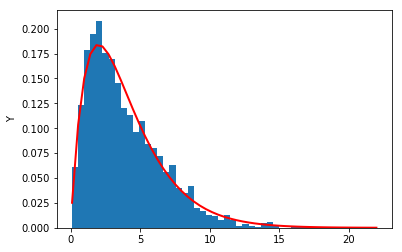

In [76]:
# mean=4, std=2*sqrt(2)
shape = 2.0
scale = 2.0
y = gamma(shape, scale, n_sample)

count, bins, ignored = plt.hist(y, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.ylabel("Y")
plt.show()

входы : 
 [[1.88797268 1.        ]
 [4.48292922 1.        ]
 [1.82687662 1.        ]] 
выход:
 [ 5.56814583 25.1670863   6.57961394]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      498
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.19598
Method:                          IRLS   Log-Likelihood:                -1282.8
Date:                Mon, 16 Nov 2020   Deviance:                       103.82
Time:                        17:52:13   Pearson chi2:                     97.6
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975

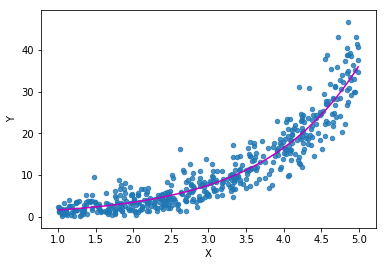

In [77]:
## регрессия по распределению Пуассона - Poisson regression

# искусственные данные
np.random.seed(5)
n_sample = 500
a = 0.8
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)  # закон для мат.ожид
y =  gamma(mu) # строим распределение пуассона на идеальной регрессии mu


exog, endog = sm.add_constant(x, prepend=False), y  # определяем вход (с добавление столбца 1 для свободного члена регрессии) и выход



print('входы : \n',exog[:3,:],'\nвыход:\n',endog[:3])


glm_gamma = sm.GLM(endog, exog, family=sm.families.Gamma(sm.families.links.log()))
res = glm_gamma.fit()

print(res.summary())


y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Logistic regression

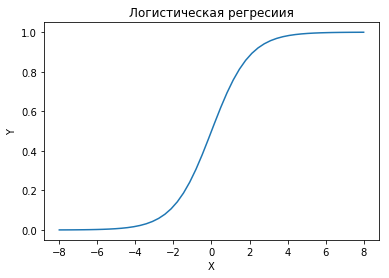

In [78]:

## logistic 

def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Логистическая регресиия')
plt.show()

входы : 
 [[1.         1.00153158]
 [1.         1.00469183]
 [1.         1.00656869]] 
выход:
 [0 0 0]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.95
Date:                Mon, 16 Nov 2020   Deviance:                       605.90
Time:                        17:52:16   Pearson chi2:                 1.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

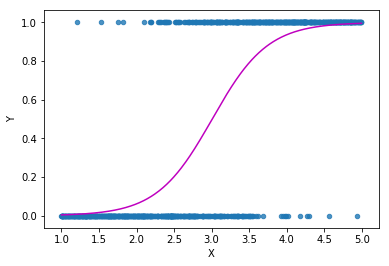

In [79]:
## регрессия по распределению Пуассона - Poisson regression

# искусственные данные
np.random.seed(5)
n_sample = 1000
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b)  # основная модель
y = binomial(n=1, p=q) #биноминальное распределение

exog, endog = sm.add_constant(x), y # определяем вход (с добавление столбца 1 для свободного члена регрессии) и выход
print('входы : \n',exog[:3,:],'\nвыход:\n',endog[:3])

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit())) # Функция связи Logit
res = mod.fit()
print(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## произвольный  GLM

In [80]:
np.random.seed(5)
n_sample = 1000
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample) # входная переменная
mu = np.exp(a * x + b) # идеальная регрессия
y = normal(mu, sd) # Нормальное рассеивание

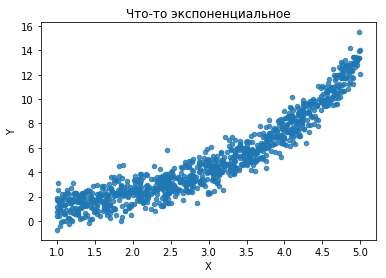

In [81]:
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Что-то экспоненциальное')
plt.show()

входы : 
 [[1.         1.88797268]
 [1.         4.48292922]
 [1.         1.82687662]] 
выход:
 [ 2.7979761  10.95086032  4.53015634]
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.65093
Method:                          IRLS   Log-Likelihood:                -1203.3
Date:                Mon, 16 Nov 2020   Deviance:                       649.63
Time:                        17:52:19   Pearson chi2:                     650.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975

Text(0, 0.5, 'Y')

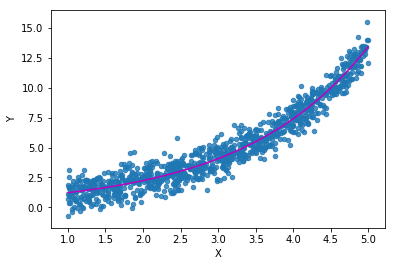

In [82]:
exog = sm.add_constant(x)
endog = y
# определяем вход (с добавление столбца 1 для свободного члена регрессии) и выход
print('входы : \n',exog[:3,:],'\nвыход:\n',endog[:3])

# нормальное распределение  + логарифмическая функция связи
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))  # логарифмическая функция связи
res = mod.fit()
print(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_fit.png')